In [1]:
from sklearn.manifold import Isomap
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from sklearn.neighbors import kneighbors_graph
from sklearn.neighbors import NearestNeighbors

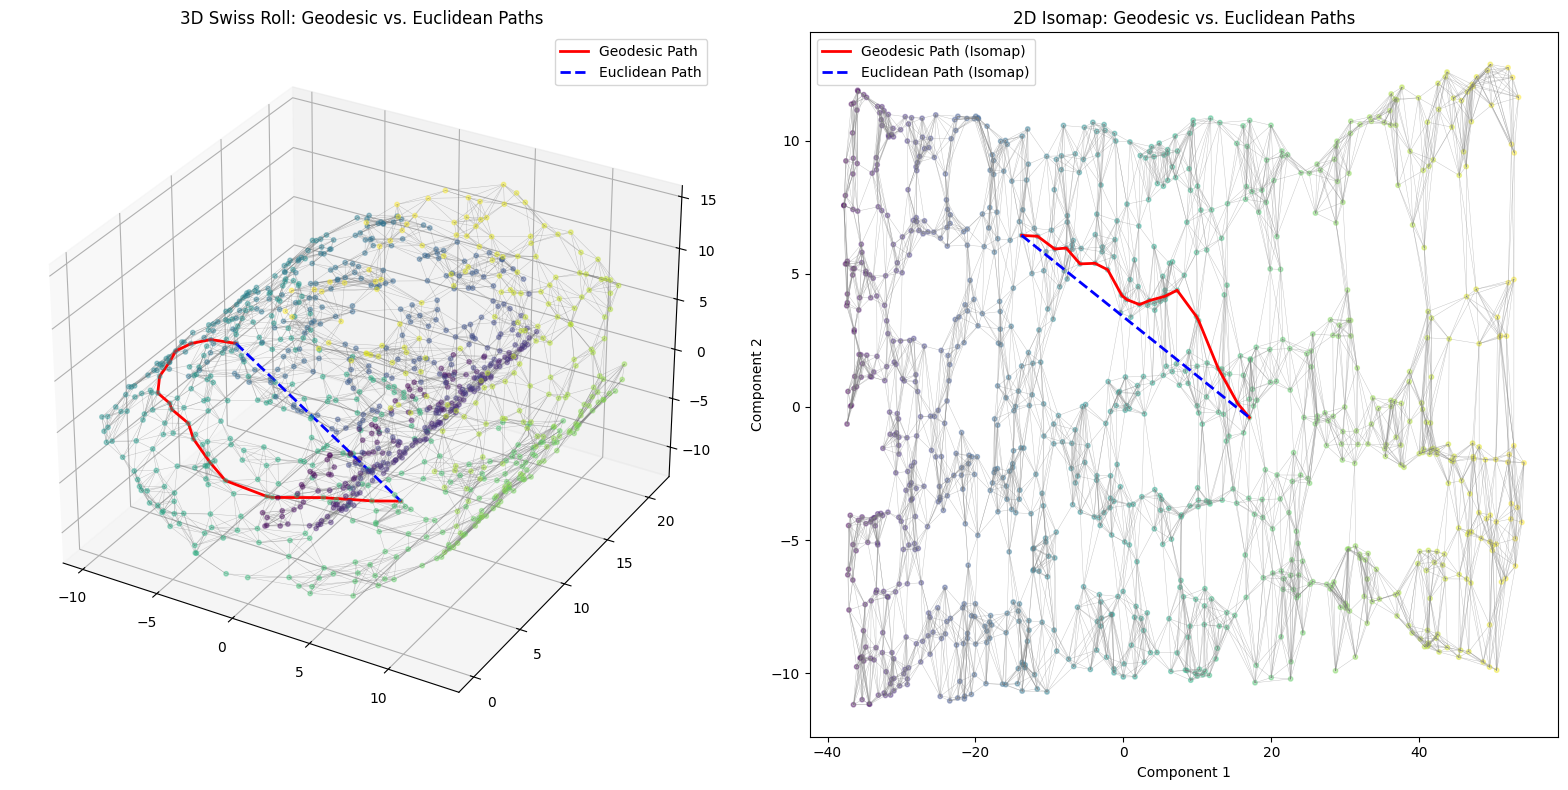

3D Euclidean distance: 20.66
3D Geodesic distance: 31.48
2D Euclidean distance (Isomap): 31.54


In [2]:


# Generate Swiss Roll data
points, color = make_swiss_roll(n_samples=1000, noise=0.1, random_state=42)
p1, p2 = 0, 500  # Points to compare

# Compute geodesic path (k-NN graph)
nbrs = NearestNeighbors(n_neighbors=10).fit(points)
_, indices = nbrs.kneighbors(points)
G = nx.Graph()
for i in range(points.shape[0]):
    for j in indices[i]: # iterate over all the neighbour in vertex i
        if i != j: # make sure no loop
            G.add_edge(i, j, weight=np.linalg.norm(points[i] - points[j]))
# get the vertices of the geodesic distance
path = nx.shortest_path(G, source=p1, target=p2, weight='weight')

# Isomap embedding
iso = Isomap(n_neighbors=10, n_components=2)
points_iso = iso.fit_transform(points)

# Path coordinates
path_3d = points[path]  # 3D geodesic path
path_iso = points_iso[path]  # 2D geodesic path
euclidean_3d = np.array([points[p1], points[p2]])  # 3D straight line
euclidean_iso = np.array([points_iso[p1], points_iso[p2]])  # 2D straight line

# Plotting
fig = plt.figure(figsize=(16, 8))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(points[:, 0], points[:, 1], points[:, 2], c=color, cmap=plt.cm.viridis, s=10, alpha=0.4)

# show the knn graph edge
for i in range(points.shape[0]):
    for j in indices[i]:
        if i < j:
            ax1.plot([points[i,0], points[j,0]], [points[i,1], points[j,1]], [points[i,2], points[j,2]], 
                     color='gray', alpha=0.5, lw=0.3)

# Geodesic vs. Euclidean paths
ax1.plot(path_3d[:,0], path_3d[:,1], path_3d[:,2], 
         color='red', lw=2, label='Geodesic Path')
ax1.plot(euclidean_3d[:,0], euclidean_3d[:,1], euclidean_3d[:,2], 
         color='blue', linestyle='--', lw=2, label='Euclidean Path')
ax1.set_title("3D Swiss Roll: Geodesic vs. Euclidean Paths")
ax1.legend()


ax2 = fig.add_subplot(122)
ax2.scatter(points_iso[:,0], points_iso[:,1], c=color, cmap=plt.cm.viridis, s=10, alpha=0.4)

# Plot k-NN graph edges (2D)
knn_graph_2d = kneighbors_graph(points_iso, n_neighbors=10, mode='connectivity')
G_2d = nx.from_scipy_sparse_array(knn_graph_2d)
for i, j in G_2d.edges():
    ax2.plot([points_iso[i,0], points_iso[j,0]], [points_iso[i,1], points_iso[j,1]], 
             color='gray', alpha=0.5, lw=0.3)

# Geodesic vs. Euclidean paths
ax2.plot(path_iso[:,0], path_iso[:,1], 
         color='red', lw=2, label='Geodesic Path (Isomap)')
ax2.plot(euclidean_iso[:,0], euclidean_iso[:,1], 
         color='blue', linestyle='--', lw=2, label='Euclidean Path (Isomap)')
ax2.set_title("2D Isomap: Geodesic vs. Euclidean Paths")
ax2.set_xlabel("Component 1")
ax2.set_ylabel("Component 2")
ax2.legend()

plt.tight_layout()
plt.show()
print(f"3D Euclidean distance: {np.linalg.norm(points[p1] - points[p2]):.2f}")
print(f"3D Geodesic distance: {sum(np.linalg.norm(path_3d[i+1] - path_3d[i]) for i in range(len(path_3d)-1)):.2f}")
print(f"2D Euclidean distance (Isomap): {np.linalg.norm(points_iso[p1] - points_iso[p2]):.2f}")